In [1]:
import tensorflow as tf
import numpy as np

### Set up training data

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38,  55,  60,  70],  dtype=np.float32)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100, 131, 140, 156],  dtype=np.float32)

for i,c in enumerate(celsius_q):
    print("{:5}°C = {:5}°F".format(c, fahrenheit_a[i]))

-40.0°C = -40.0°F
-10.0°C =  14.0°F
  0.0°C =  32.0°F
  8.0°C =  46.0°F
 15.0°C =  59.0°F
 22.0°C =  72.0°F
 38.0°C = 100.0°F
 55.0°C = 131.0°F
 60.0°C = 140.0°F
 70.0°C = 156.0°F


## Optimization



In [13]:
W = tf.Variable(1.0)
b = tf.Variable(20.0)

In [3]:
def output(X, W, b):
  return X * W + b

### Define Loss function

In [6]:
def mse(y, yhat):
  return tf.reduce_mean(tf.square(yhat - y))

### Train Model

In [14]:
lr = 6e-4

history = []

for i in range(3000):
  with tf.GradientTape() as tape:
    yhat = output(celsius_q, W, b)
    loss = mse(fahrenheit_a, yhat)

  history.append(loss.numpy())

  dW, db = tape.gradient(loss, [W, b])
  W.assign_sub(lr * dW)
  b.assign_sub(lr * db)

In [15]:
W, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.8048505>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=30.970625>)

### Predict

In [16]:
x_i = 100
y_i = output(x_i, W, b).numpy()
y_i

211.45567

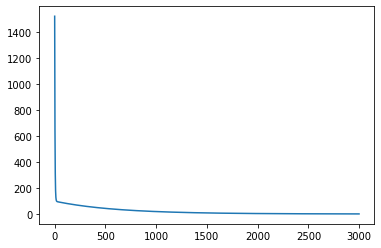

In [17]:
import matplotlib.pyplot as plt

plt.plot(history)